### 1. Analyze the data

#### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

#### Data preprocessing

In [3]:
df = pd.read_csv('Downloads/MSFT_train_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       881 non-null    object 
 1   Open       881 non-null    float64
 2   High       881 non-null    float64
 3   Low        881 non-null    float64
 4   Close      881 non-null    float64
 5   Adj Close  881 non-null    float64
 6   Volume     881 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 48.3+ KB


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
876,2020-11-10,214.500000,216.500000,209.720001,211.009995,208.278870,44045100
877,2020-11-11,212.389999,218.039993,212.199997,216.550003,213.747177,29440800
878,2020-11-12,217.210007,219.110001,214.460007,215.440002,212.651550,21593900
879,2020-11-13,216.360001,217.419998,214.160004,216.509995,213.707687,18621100
880,2020-11-16,214.869995,217.740005,214.520004,217.229996,214.418365,24953300


In [5]:
df['Adj Close']=pd.to_numeric(df.Close, errors = 'coerce')
df = df.dropna()
train_data = df.iloc[:,5:6].values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 880
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       881 non-null    object 
 1   Open       881 non-null    float64
 2   High       881 non-null    float64
 3   Low        881 non-null    float64
 4   Close      881 non-null    float64
 5   Adj Close  881 non-null    float64
 6   Volume     881 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.1+ KB


### 2. Train the model

In [8]:
sc = MinMaxScaler(feature_range=(0,1))
train_data = sc.fit_transform(train_data)
train_data.shape

(881, 1)

In [9]:
x_train = []
y_train = []

for i in range (60,881): #60 = timestep // 881 = leangth of the data
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1)) 
x_train.shape

(821, 60, 1)

In [11]:
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [12]:
model.compile(optimizer='adam', loss="mean_squared_error")

In [13]:
hist = model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
26/26 - 7s - loss: 0.0302 - 7s/epoch - 262ms/step
Epoch 2/20
26/26 - 2s - loss: 0.0037 - 2s/epoch - 96ms/step
Epoch 3/20
26/26 - 2s - loss: 0.0032 - 2s/epoch - 87ms/step
Epoch 4/20
26/26 - 2s - loss: 0.0041 - 2s/epoch - 85ms/step
Epoch 5/20
26/26 - 2s - loss: 0.0039 - 2s/epoch - 91ms/step
Epoch 6/20
26/26 - 2s - loss: 0.0031 - 2s/epoch - 89ms/step
Epoch 7/20
26/26 - 2s - loss: 0.0036 - 2s/epoch - 88ms/step
Epoch 8/20
26/26 - 2s - loss: 0.0036 - 2s/epoch - 88ms/step
Epoch 9/20
26/26 - 2s - loss: 0.0034 - 2s/epoch - 88ms/step
Epoch 10/20
26/26 - 2s - loss: 0.0027 - 2s/epoch - 87ms/step
Epoch 11/20
26/26 - 2s - loss: 0.0027 - 2s/epoch - 87ms/step
Epoch 12/20
26/26 - 2s - loss: 0.0027 - 2s/epoch - 92ms/step
Epoch 13/20
26/26 - 2s - loss: 0.0032 - 2s/epoch - 88ms/step
Epoch 14/20
26/26 - 2s - loss: 0.0025 - 2s/epoch - 87ms/step
Epoch 15/20
26/26 - 2s - loss: 0.0025 - 2s/epoch - 89ms/step
Epoch 16/20
26/26 - 3s - loss: 0.0028 - 3s/epoch - 103ms/step
Epoch 17/20
26/26 - 2s - loss: 

<function matplotlib.pyplot.show(close=None, block=None)>

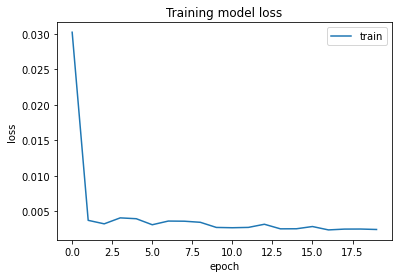

In [14]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show

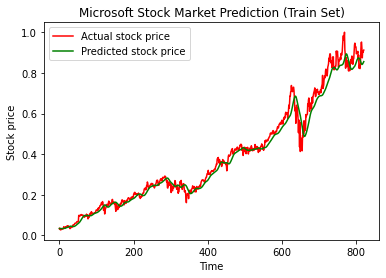

In [63]:
plt.plot(y_train, color = 'red', label = 'Actual stock price')
plt.plot(model.predict(x_train), color = 'green', label = 'Predicted stock price')
plt.title('Microsoft Stock Market Prediction (Train Set)')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()

### 3. Test the model

In [52]:
test_data = pd.read_csv('Downloads/MSFT_test_data.csv')

In [53]:
test_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-17,216.100006,217.679993,214.080002,214.460007,211.684235,24154100
1,2020-11-18,213.649994,215.169998,210.929993,211.080002,208.893448,28372800
2,2020-11-19,211.380005,213.029999,209.929993,212.419998,210.219559,24792700
3,2020-11-20,212.199997,213.289993,210.000000,210.389999,208.210571,22843100
4,2020-11-23,210.949997,212.289993,208.160004,210.110001,207.933487,25683500
...,...,...,...,...,...,...,...
373,2022-05-12,257.690002,259.880005,250.020004,255.350006,255.350006,51033800
374,2022-05-13,257.350006,263.040009,255.350006,261.119995,261.119995,34893400
375,2022-05-16,259.959991,265.820007,255.779999,261.500000,261.500000,32550900
376,2022-05-17,266.109985,268.329987,262.459991,266.820007,266.820007,28806100


In [54]:
test_data['Adj Close'] = pd.to_numeric(test_data.Close, errors = 'coerce')
test_data = test_data.dropna()
test_data = test_data.iloc[:,5:6]
y_test = test_data.iloc[60:,0:].values

In [58]:
test_data.tail()

,Adj Close
373,255.350006
374,261.119995
375,261.500000
376,266.820007
377,257.019989


In [56]:
#input array for the model
inputClossing = test_data.iloc[:,0:].values
inputClossing_scaled = sc.transform(inputClossing)
inputClossing_scaled.shape

(378, 1)

In [48]:
x_test = []
length = len(test_data)
timestep = 60

for i in range (timestep, length):
    x_test.append(inputClossing_scaled[i-timestep:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(318, 60, 1)

In [20]:
y_pred = model.predict(x_test)

In [21]:
predicted_price = sc.inverse_transform(y_pred)

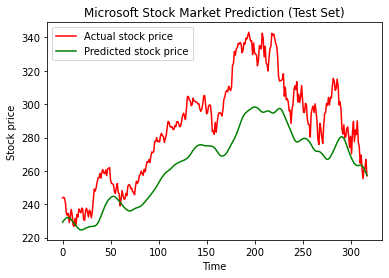

In [64]:
plt.plot(y_test, color = 'red', label = 'Actual stock price')
plt.plot(predicted_price, color = 'green', label = 'Predicted stock price')
plt.title('Microsoft Stock Market Prediction (Test Set)')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()

### 4. Prediction Accuracy

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predicted_price)

631.4136503632519

In [24]:
#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [61]:
#calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train, model.predict(x_train))}\t{r2_score(y_test, predicted_price)}
'''

In [62]:
print(scores)


Metric           Train                Test        
r2_score  0.9779954818985533	0.33157676380623735

